<a href="https://colab.research.google.com/github/mjdabendoh/Finance-Tradin/blob/main/02_WorkflowFundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pytorch.org/docs/stable/nn.html

https://www.mrdbourke.com/ml-courses/
Zero to Mastery TensorFlow for Deep Learning is a follow-on from the first and specifically focuses on deep learning, a subset of machine learning achieving outstanding results in many fields. This course packs 60+ hours of video to take you from having a little experience with Python machine learning code to replicating state-of-the-art deep learning research papers

Try  to use another model

In [ ]:
# Create ML using linearRegression

# 1 import the necessary libraries:
import matplotlib.pyplot as plt
import torch
from torch import nn    # contain all the building block for neural networks
from torch.random import manual_seed
from torch.autograd.grad_mode import inference_mode

# get the version of torch
print(f"torch_Version:", {torch.__version__})


torch_Version: {'2.0.1+cu118'}


In [ ]:
# Prepare some Data , for LinearRegression
# => Linear Regression formula is  : y = weights * x + bias

# All the usefull data store below :

weights = 0.5
bias = 0.2
size_train = 0.8                         # use to split the size for trainig & testing data
                                         # 0.8 mean 80% of the data will be use to train the model

start = 0
end =1
step =0.009


X = torch.arange(start, end, step).unsqueeze(dim =1)
y = weights * X + bias

print(len(X)), print(len(y))
X[ :15], y[ : 15]

112
112


(tensor([[0.0000],
         [0.0090],
         [0.0180],
         [0.0270],
         [0.0360],
         [0.0450],
         [0.0540],
         [0.0630],
         [0.0720],
         [0.0810],
         [0.0900],
         [0.0990],
         [0.1080],
         [0.1170],
         [0.1260]]),
 tensor([[0.2000],
         [0.2045],
         [0.2090],
         [0.2135],
         [0.2180],
         [0.2225],
         [0.2270],
         [0.2315],
         [0.2360],
         [0.2405],
         [0.2450],
         [0.2495],
         [0.2540],
         [0.2585],
         [0.2630]]))

In [ ]:
# Now we get some data , let's split for training & testing purpose
# and let's vizualise our data

# Split the data
split_train = int(size_train*len(X))             # 80% of the data is for training
X_train, y_train = X[ : split_train], y[ :split_train]
X_test, y_test = X[split_train : ], y[split_train :]

# Contrôle the data : data_size = 112
len(X_train), len(y_train), len(X_test), len(y_test)

(89, 89, 23, 23)

In [ ]:
# Build a method to visualize the data:

def plot_predictions(train_data =X_train,
                     train_labels =y_train,
                     test_data =X_test,
                     test_labels =y_test,
                     predictions = None):
  """
  Plot training, testing data & predictions ; then compares

  """
  plt.figure(figsize =(8, 8))

  # Plot training data in blue :
  plt.scatter(train_data, train_labels, s = 8, c ="b", label = "Training Data")


  # Plot testing data:
  plt.scatter(test_data, test_labels, s =6,  c ="g", label ="Testing Data")

  if predictions is not None:
    # Plot predictions in red:
    plt.scatter(test_data, predictions, s = 3, c ="r", label ="Predictions")

  # Show legend :
  plt.legend(prop ={"size" :14})
  plt.show()




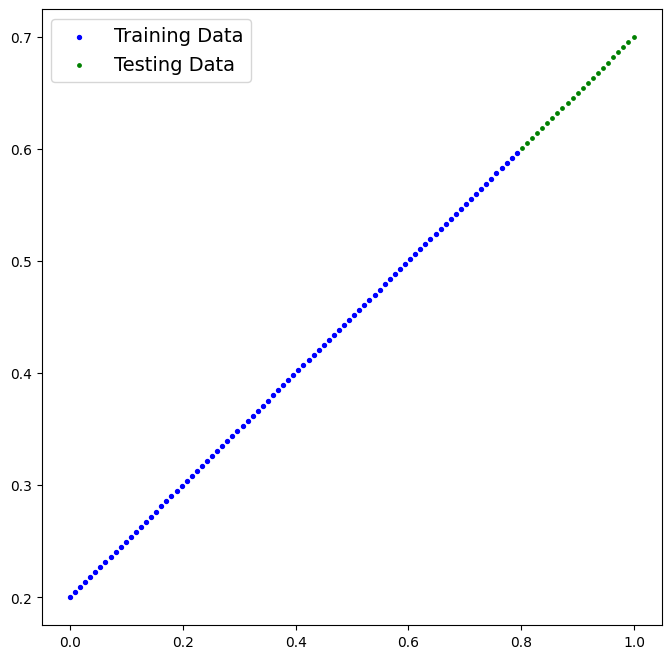

In [ ]:
plot_predictions();

# After visualize the data , let's build our model :

In [ ]:
# Building the model:

class LinearRegressionModel(nn.Module):                               # All the Neural network on PyTorch are a subclass of nn.Module
  def __init__(self):
    super().__init__()
    # Pass the parameters, in PyTorch all the parameters start with random
    # By default torch use float 32
    self.weights = nn.Parameter(torch.randn(1,
                                             dtype = torch.float),
                                 requires_grad = True)

    self.bias =nn.Parameter(torch.randn(1,
                                         dtype =torch.float),
                             requires_grad = True)

  # All the model in PyTorch are using the forward function :
  def forward(self, x : torch.Tensor)-> torch.Tensor:
     # x is the input data
     return self.weights * x + self.bias

Resource: See more of these essential modules and their uses cases in the https://pytorch.org/tutorials/beginner/ptcheat.html

In [ ]:
# set manual seed
torch.manual_seed(42)

# let's check our model:
model_0 = LinearRegressionModel()  # We create an instance of the model

# check the nn parameter
model_0.state_dict() , list(model_0.parameters())


(OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]),
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)])

In [ ]:
# Now let's make some predictions :

with inference_mode():
  y_preds =model_0(X_test)

"""
# Note that we possible use no_grad (old version)
with no_grad():
  y_preds = model_0(X_test)
"""

'\n# Note that we possible use no_grad (old version)\nwith no_grad():\n  y_preds = model_0(X_test)\n'

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 23
Number of predictions made: 23
Predicted values:
tensor([[0.3985],
        [0.4015],
        [0.4046],
        [0.4076],
        [0.4106],
        [0.4136],
        [0.4167],
        [0.4197],
        [0.4227],
        [0.4258],
        [0.4288],
        [0.4318],
        [0.4349],
        [0.4379],
        [0.4409],
        [0.4440],
        [0.4470],
        [0.4500],
        [0.4530],
        [0.4561],
        [0.4591],
        [0.4621],
        [0.4652]])


In [ ]:
# Check the gap between our predictions & the ideal output
y_preds-y_test # Enormous gap

tensor([[-0.2020],
        [-0.2035],
        [-0.2049],
        [-0.2064],
        [-0.2079],
        [-0.2094],
        [-0.2108],
        [-0.2123],
        [-0.2138],
        [-0.2152],
        [-0.2167],
        [-0.2182],
        [-0.2196],
        [-0.2211],
        [-0.2226],
        [-0.2240],
        [-0.2255],
        [-0.2270],
        [-0.2285],
        [-0.2299],
        [-0.2314],
        [-0.2329],
        [-0.2343]])

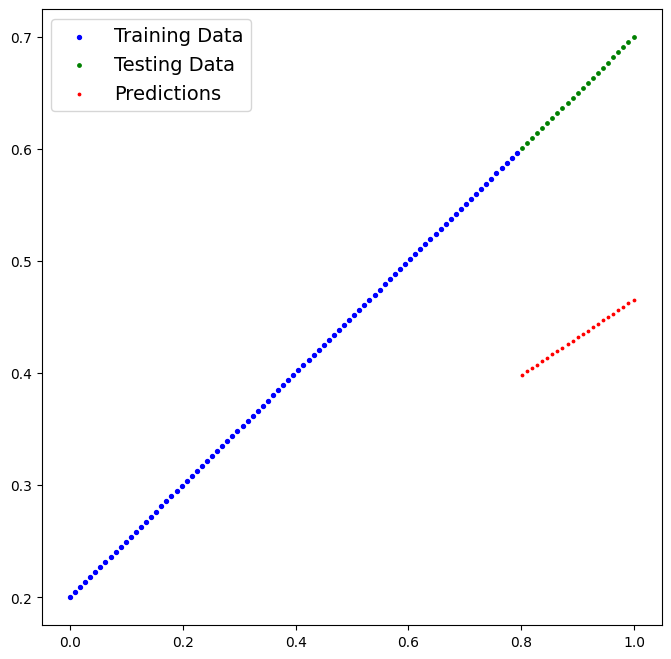

In [ ]:
plot_predictions(predictions =y_preds)

In [ ]:
# Now we are working to reduce this gap, and make our model close to what we must to predict

# 1 Calculate the loss :
loss_fn = nn.L1Loss()

# 2 Optimize the zero grad
optimizer  = torch.optim.SGD(model_0.parameters(), lr =0.01)

# Try this optim
#optimizer  = torch.optim.SGD(model_0.parameters(), lr =0.01, momentum=0.9)

In [ ]:
# Put all together :
torch.manual_seed(42)

epochs = 100

#Create an empty to records the loss :
loss_test_values =[]
loss_train_values =[]

epoch_count = []

# Training loop :
for epoch in range (epochs) :

  #put the model in trainig mode:
  model_0.train()

  # pass the data through the model:
  y_pred = model_0(X_train)

  #Calculate the loss:
  loss = loss_fn(y_pred, y_train)

  #pass the optimizer to zero grad :
  optimizer.zero_grad()

  # loss backward:
  loss.backward()

  #progress the optimizer
  optimizer.step()

  # put the model in testing mode :
  model_0.eval()

  #testing loop:
  with inference_mode():

    # forward pass on test data :
    test_pred =model_0(X_test)

    #Calculate loss on test data:
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    # print what happening :
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_test_values.append(test_loss.detach().numpy())
      loss_train_values.append(loss.detach().numpy())
      print(f"Epoch:{epoch}| MAE Train Loss:{loss}| MAE Test Loss:{test_loss}")

Epoch:0| MAE Train Loss:0.13586121797561646| MAE Test Loss:0.20460525155067444
Epoch:10| MAE Train Loss:0.031350065022706985| MAE Test Loss:0.07974007725715637
Epoch:20| MAE Train Loss:0.01974097080528736| MAE Test Loss:0.046757087111473083
Epoch:30| MAE Train Loss:0.016286563128232956| MAE Test Loss:0.03765277937054634
Epoch:40| MAE Train Loss:0.012854557484388351| MAE Test Loss:0.02947928011417389
Epoch:50| MAE Train Loss:0.009422662667930126| MAE Test Loss:0.02161606028676033
Epoch:60| MAE Train Loss:0.0059913452714681625| MAE Test Loss:0.013442562893033028
Epoch:70| MAE Train Loss:0.002565048635005951| MAE Test Loss:0.0049624391831457615
Epoch:80| MAE Train Loss:0.00365628395229578| MAE Test Loss:0.006340547930449247
Epoch:90| MAE Train Loss:0.00365628395229578| MAE Test Loss:0.006340547930449247


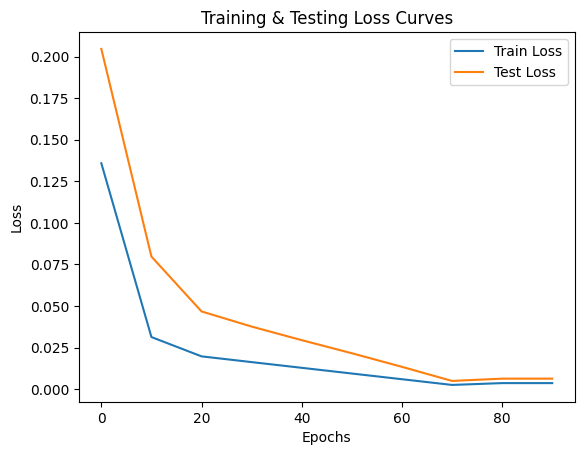

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, loss_train_values, label ="Train Loss")
plt.plot(epoch_count, loss_test_values, label ="Test Loss")
plt.title("Training & Testing Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Let's inspect with the original data
print("The model learned the following values for weights & bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights & bias are:")
print(f"weights :{weights}, \nbias :{bias}")

The model learned the following values for weights & bias:
OrderedDict([('weights', tensor([0.4929])), ('bias', tensor([0.1991]))])

And the original values for weights & bias are:
weights :0.5, 
bias :0.2


In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.5940],
        [0.5984],
        [0.6028],
        [0.6073],
        [0.6117],
        [0.6162],
        [0.6206],
        [0.6250],
        [0.6295],
        [0.6339],
        [0.6383],
        [0.6428],
        [0.6472],
        [0.6516],
        [0.6561],
        [0.6605],
        [0.6650],
        [0.6694],
        [0.6738],
        [0.6783],
        [0.6827],
        [0.6871],
        [0.6916]])

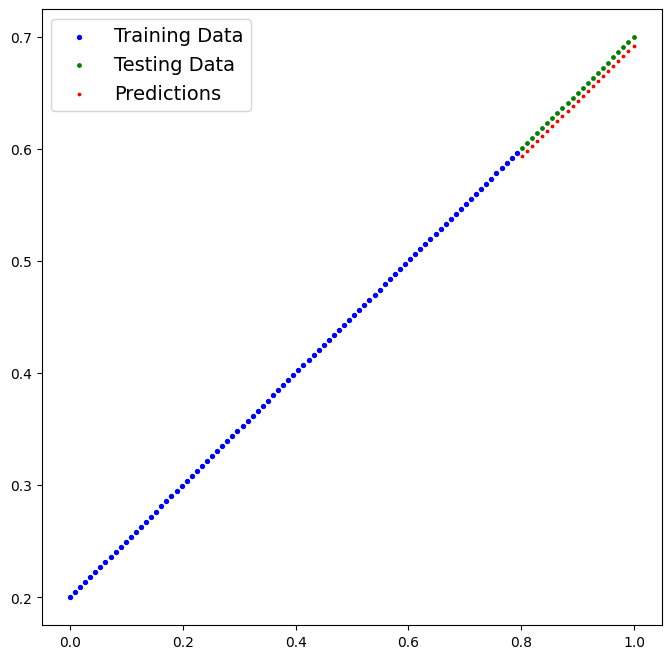

In [ ]:
plot_predictions(predictions =y_preds)

saving mode:
https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [ ]:
from pathlib import Path

# 1 Create models directory
MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# 2 Create model save path
MODEL_NAME ="02_WorkflowFundamental.pth"
MODEL_SAVE_PATH =MODEL_PATH / MODEL_NAME

# 3 Save the model state dict
print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)   #only saving the state_dict() only saves the models learned parameters

Saving model to :models/02_WorkflowFundamental.pth


In [ ]:
# Check the saved file path
!ls -l models/02_WorkflowFundamental.pth

-rw-r--r-- 1 root root 1187 Jul 16 09:25 models/02_WorkflowFundamental.pth


# Comme from MDBOURNE ⁉## Loading a saved PyTorch model's `state_dict()`

Since we've now got a saved model `state_dict()` at `models/01_pytorch_workflow_model_0.pth` we can now load it in using `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the filepath of our saved model `state_dict()`.

Why call `torch.load()` inside `torch.nn.Module.load_state_dict()`?

Because we only saved the model's `state_dict()` which is a dictionary of learned parameters and not the *entire* model, we first have to load the `state_dict()` with `torch.load()` and then pass that `state_dict()` to a new instance of our model (which is a subclass of `nn.Module`).

Why not save the entire model?

[Saving the entire model](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) rather than just the `state_dict()` is more intuitive, however, to quote the PyTorch documentation (italics mine):

> The disadvantage of this approach *(saving the whole model)* is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...
>
> Because of this, your code can break in various ways when used in other projects or after refactors.

So instead, we're using the flexible method of saving and loading just the `state_dict()`, which again is basically a dictionary of model parameters.

Let's test it out by created another instance of `LinearRegressionModel()`, which is a subclass of `torch.nn.Module` and will hence have the in-built method `load_state_dict()`.

In [ ]:
# Loading a saved model:
# Instantiate a new instance of our model:
loaded_model_0 =LinearRegressionModel()

# Load the state_dict of our saved model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

Now we can test our model passing to the evaluate mode

In [ ]:
# 1 Put the loaded  model into evaluation mode:
loaded_model_0.eval()

# 2 Use the inference mode to get the predictions :
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with loaded model

In [ ]:
# Compare previous predictions with the loaded predictions:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

FROM MDB:
Nice!

It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

> **Note:** There are more methods to save and load PyTorch models but I'll leave these for extra-curriculum and further reading. See the [PyTorch guide for saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models) for more.

## 6. Putting it all together

We've covered a fair bit of ground so far.

But once you've had some practice, you'll be performing the above steps like dancing down the street.

Speaking of practice, let's put everything we've done so far together.

Except this time we'll make our code device agnostic (so if there's a GPU available, it'll use it and if not, it will default to the CPU).

There'll be far less commentary in this section than above since what we're going to go through has already been covered.

We'll start by importing the standard libraries we need.

> **Note:** If you're using Google Colab, to setup a GPU, go to Runtime -> Change runtime type -> Hardware acceleration -> GPU. If you do this, it will reset the Colab runtime and you will lose saved variables.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
print(f"TorchVersion : {torch.__version__}")

TorchVersion : 2.0.1+cu118


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cuda


6.1 We are using the data from the example not as we done before , just to have another look.

# Think to rewrite all the process untill the saving mode , with input mode => Just to have an integrated model

In [ ]:
# Prepare some Data , for LinearRegression
# => Linear Regression formula is  : y = weights * x + bias

# All the usefull data store below :

weights = 0.5
bias = 0.2
size_train = 0.8                         # use to split the size for trainig & testing data
                                         # 0.8 mean 80% of the data will be use to train the model

start = 0
end =1
step =0.009


X = torch.arange(start, end, step).unsqueeze(dim =1)
y = weights * X + bias

print(len(X)), print(len(y))
X[ :15], y[ : 15]

112
112


(tensor([[0.0000],
         [0.0090],
         [0.0180],
         [0.0270],
         [0.0360],
         [0.0450],
         [0.0540],
         [0.0630],
         [0.0720],
         [0.0810],
         [0.0900],
         [0.0990],
         [0.1080],
         [0.1170],
         [0.1260]]),
 tensor([[0.2000],
         [0.2045],
         [0.2090],
         [0.2135],
         [0.2180],
         [0.2225],
         [0.2270],
         [0.2315],
         [0.2360],
         [0.2405],
         [0.2450],
         [0.2495],
         [0.2540],
         [0.2585],
         [0.2630]]))

Now split the data

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(89, 89, 23, 23)

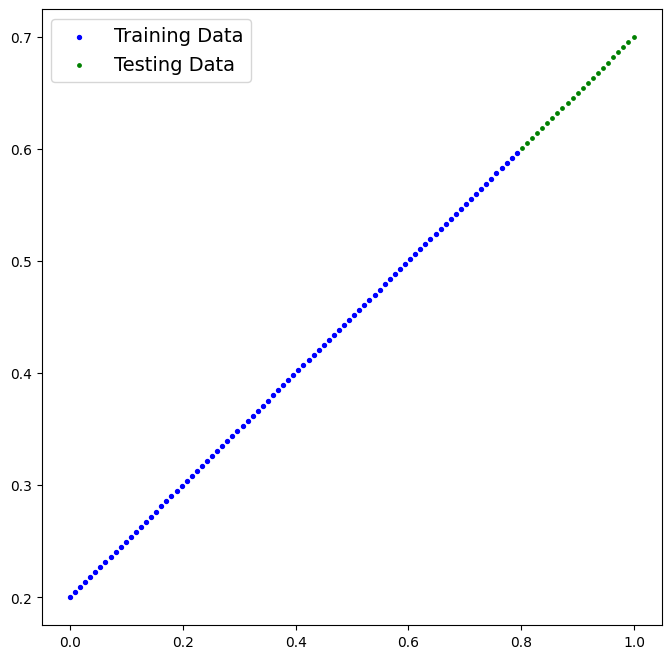

In [ ]:
# Visualize the data
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

# 6.2 Building a PyTorch linear model

We've got some data, now it's time to make a model.

We'll create the same style of model as before except this time, instead of defining the weight and bias parameters of our model manually using `nn.Parameter()`, we'll use [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) to do it for us.

Where `in_features` is the number of dimensions your input data has and `out_features` is the number of dimensions you'd like it to be output to.

In our case, both of these are `1` since our data has `1` input feature (`X`) per label (`y`).

![comparison of nn.Parameter Linear Regression model and nn.Linear Linear Regression model](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)
*Creating a linear regression model using `nn.Parameter` versus using `nn.Linear`. There are plenty more examples of where the `torch.nn` module has pre-built computations, including many popular and useful neural network layers.*


In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Notice the outputs of model_1.state_dict(), the nn.Linear() layer created a random weight and bias parameter for us.

Now let's put our model on the GPU (if it's available).

We can change the device our PyTorch objects are on using .to(device).

First let's check the model's current device.

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

the model is on the CPU by default.

Let's change it to be on the GPU (if it's available).

In [ ]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

6.3 Training
Time to build a training and testing loop.

First we'll need a loss function and an optimizer.

Let's use the same functions we used earlier, nn.L1Loss() and torch.optim.SGD().

We'll have to pass the new model's parameters (model.parameters()) to the optimizer for it to adjust them during training.

The learning rate of 0.01 worked well before too so let's use that again.

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

Beautiful, loss function and optimizer ready, now let's train and evaluate our model using a training and testing loop.

The only different thing we'll be doing in this step compared to the previous training loop is putting the data on the target device.

We've already put our model on the target device using model_1.to(device).

And we can do the same with the data.

That way if the model is on the GPU, the data is on the GPU (and vice versa).

Let's step things up a notch this time and set epochs=1000.

If you need a reminder of the PyTorch training loop steps, see below.

PyTorch training loop steps

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.7347651124000549 | Test loss: 0.8545286059379578
Epoch: 100 | Train loss: 0.005596892908215523 | Test loss: 0.013560350053012371
Epoch: 200 | Train loss: 0.005596892908215523 | Test loss: 0.013560350053012371
Epoch: 300 | Train loss: 0.005596892908215523 | Test loss: 0.013560350053012371
Epoch: 400 | Train loss: 0.005596892908215523 | Test loss: 0.013560350053012371
Epoch: 500 | Train loss: 0.005596892908215523 | Test loss: 0.013560350053012371
Epoch: 600 | Train loss: 0.005596892908215523 | Test loss: 0.013560350053012371
Epoch: 700 | Train loss: 0.005596892908215523 | Test loss: 0.013560350053012371
Epoch: 800 | Train loss: 0.005596892908215523 | Test loss: 0.013560350053012371
Epoch: 900 | Train loss: 0.005596892908215523 | Test loss: 0.013560350053012371


In [ ]:
# Let's check the parameters our model has learned and compare them to the original parameters we hard-coded.
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.5111]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1900], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.2


# 6.4 Making predictions
Now we've got a trained model, let's turn on it's evaluation mode and make some predictions.

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.5994],
        [0.6040],
        [0.6086],
        [0.6132],
        [0.6178],
        [0.6224],
        [0.6270],
        [0.6316],
        [0.6362],
        [0.6408],
        [0.6454],
        [0.6500],
        [0.6546],
        [0.6592],
        [0.6638],
        [0.6684],
        [0.6730],
        [0.6776],
        [0.6822],
        [0.6868],
        [0.6914],
        [0.6960],
        [0.7006]], device='cuda:0')

If you're making predictions with data on the GPU, you might notice the output of the above has `device='cuda:0'` towards the end. That means the data is on CUDA device 0 (the first GPU your system has access to due to zero-indexing), if you end up using multiple GPUs in the future, this number may be higher.

Now let's plot our model's predictions.

> **Note:** Many data science libraries such as pandas, matplotlib and NumPy aren't capable of using data that is stored on GPU. So you might run into some issues when trying to use a function from one of these libraries with tensor data not stored on the CPU. To fix this, you can call [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) on your target tensor to return a copy of your target tensor on the CPU.

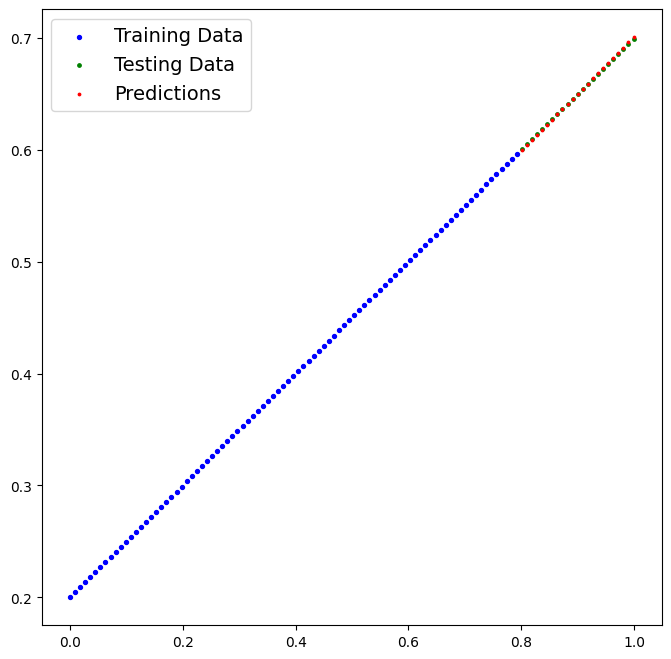

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

# 6.5 Saving and loading a model
We're happy with our models predictions, so let's save it to file so it can be used later.



In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


And just to make sure everything worked well, let's load it back in.

We'll:

Create a new instance of the LinearRegressionModelV2() class
Load in the model state dict using torch.nn.Module.load_state_dict()
Send the new instance of the model to the target device (to ensure our code is device-agnostic)


In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')